<a href="https://colab.research.google.com/github/rosacarla/treinamento-de-rede-neural-MLP/blob/main/Treinamento_S4_MLP_cesrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>TREINAMENTO DE REDE NEURAL MLP - ATIVIDADE SOMATIVA 1</b>
CURSO: TECNOLOGIA EM INTELIGÊNCIA ARTIFICIAL APLICADA  
DISCIPILINA: REDES NEURAIS  
ESTUDANTE: CARLA EDILA SILVEIRA  
OBJETIVO: treinamento de rede neural MLP para identificação correta de números manuscritos de 0 a 9 em dois conjuntos de imagens, mediante diferentes combinações de parâmetros ajustáveis do modelo.  
DATA: 10/09/2023  

<body>
<img src="https://www.hardware.com.br/wp-content/uploads/2023/04/shutterstock_728178127-scaled-1-2048x819.jpg" width=970 height=296>
</body>

In [ ]:
# IMPORTAÇÃO DE BIBLIOTECAS
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
# CRIAÇÃO DO MODELO MLP
model = Sequential()

In [ ]:
# DEFINIÇÃO DA QUANTIDADE DE NEURÔNIOS DAS CAMADAS
n1 = 28 # Quantidade de neuronios da Camada Oculta 1
n2 = 32 # Quantidade de neuronios da Camada Oculta 2
n3 = 20 # Quantidade de neuronios da Camada Oculta 3
ns = 20 # Quantidade de neuronios da Camada de Sai­da

In [ ]:
# DEFINIÇÃO DAS FUNÇÕES DE ATIVAÇÃO
    # relu    -> Rectified Linear Unit (Unidade Linear Retificada)
    # sigmoid -> sigmoid(x) = 1 / (1 + exp(-x))
    # tanh    -> Tangente hiperbolica
    # softmax -> Utilizada na camada de sai­da

# Selecione a Funcao de Ativacao da Camada Oculta 1
fa1 = 'tanh'

# Selecione a Funcao de Ativacao da Camada Oculta 2
fa2 = 'relu'

# Selecione a Funcao de Ativacao da Camada de Sai­da
fas = 'sigmoid'

In [ ]:
# ADIÇÃO DE CAMADAS A REDE NEURAL

# Primeira Camada Oculta:
# Com 784 neuronios na camada de entrada -> 28x28 pixels (tamanho das imagens)
model.add(Dense(units=n1, activation=fa1, input_dim=784))

# Segunda Camada Oculta (desabilitada por padrao)
#model.add(Dense(units=n2, activation=fa2))

# Camada de Sai­da
model.add(Dense(units=ns, activation=fas))

In [ ]:
# DEFINIÇÃO DA FUNÇÃO DE PERDA
    # mean_squared_error       -> Erro quadratico medio.
    # binary_crossentropy      -> Entropia cruzada binaria.
    # categorical_crossentropy -> Entropia cruzada categorica.
    # mean_absolute_error      -> Erro absoluto medio.

# INSERIR ABAIXO A FUNÇÃO DE PERDA ESCOLHIDA
fp = 'mean_squared_error'

In [ ]:
# DEFINIÇÃO DO OTIMIZADOR
    # sgd     -> Descida de gradiente estocastico (SGD).
    # adam    -> SGD com adaptacao de taxa de aprendizado.
    # rmsprop -> Baseado em Root Mean Square Propagation.
    # adagrad -> Adapta a taxa de aprendizado para cada parametro.

# INSERIR ABAIXO O OTIMIZADOR ESCOLHIDO
otimizador = 'adam'

In [ ]:
# DEFINIÇÃO DA MÉTRICA DE DESEMPENHO
    # accuracy            -> Acuracia.
    # mean_squared_error  -> Erro quadratico medio.
    # mean_absolute_error -> Erro absoluto medio.

# INSERIR ABAIXO A MÉTRICA ESCOLHIDA
metrica = 'accuracy'

In [ ]:
# COMPILAÇÃO DO MODELO

model.compile(loss=fp, optimizer=otimizador, metrics=[metrica])

In [ ]:
# CARREGAMENTO DOS DADOS DE TREINAMENTO E TESTE

(x_train, y_train), (x_test, y_test) =\
    tensorflow.keras.datasets.mnist.load_data()

In [ ]:
# PRÉ-PROCESSAMENTO DOS DADOS

# Redimensionar as imagens para um vetor unidimensional
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Converter para tipo float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train /= 255.0
x_test /= 255.0

In [ ]:
# TRANSFORMAÇÃO DOS RÓTULOS EM CODIFICAÇÃO ONE-HOT

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=ns)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=ns)

In [ ]:
# DEFINIÇÃO DO PERCENTUAL DO CONJUNTO DE DADOS DE TESTE

dados_teste = 0.4 # 0.3 significa 30%
# Aumentou-se % por haver poucos dados para MLP

In [ ]:
# DIVISÃO DOS DADOS EM CONJUNTOS DE TREINAMENTO E TESTE

x_train, x_test, y_train, y_test =\
    train_test_split(x_train, y_train, \
    test_size=dados_teste, random_state=42)

In [ ]:
# DEFINIÇÃO DO NÚMERO DE ÉPOCAS E NÚMERO DE AMOSTRAS

epocas = 20
amostras = 128

In [ ]:
# TREINAMENTO DA REDE NEURAL MLP

print('\n' + '=' * 70)
print('INICIANDO O TREINAMENTO DO MODELO... \n')

model.fit(x_train, y_train, epochs = epocas, batch_size = amostras)


INICIANDO O TREINAMENTO DO MODELO... 

Epoch 1/20
282/282 [==============================] - 2s 3ms/step - loss: 0.0488 - accuracy: 0.5715
Epoch 2/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0193 - accuracy: 0.8597
Epoch 3/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0131 - accuracy: 0.8900
Epoch 4/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0105 - accuracy: 0.9021
Epoch 5/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9099
Epoch 6/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0081 - accuracy: 0.9159
Epoch 7/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0074 - accuracy: 0.9220
Epoch 8/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0069 - accuracy: 0.9251
Epoch 9/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0065 - accuracy: 0.9283
Epoch 10/20
282/282 [==============================] - 1s 3m

In [ ]:
# MONTAGEM DO DRIVE PARA CARREGAR DADOS

#from google.colab import drive
#drive.mount("/content/gdrive")

1/1 [==============================] - 0s 21ms/step


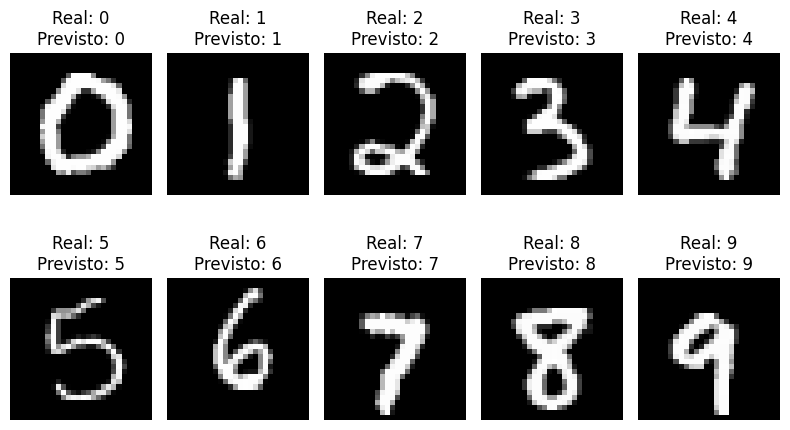

In [ ]:
# Carregar e pré-processar as imagens de teste
# HD = 'C' # Digitar a letra da Unidade de Disco
pasta = '/content/gdrive/MyDrive/RN' # Caminho da pasta de imagens

imagem0 = 'zero0.png'
imagem1 = 'um1.png'
imagem2 = 'dois2.png'
imagem3 = 'tres3.png'
imagem4 = 'quatro4.png'
imagem5 = 'cinco5.png'
imagem6 = 'seis6.png'
imagem7 = 'sete7.png'
imagem8 = 'oito8.png'
imagem9 = 'nove9.png'

image_paths = {
    pasta + '/' + imagem0 :0,
    pasta + '/' + imagem1 :1,
    pasta + '/' + imagem2 :2,
    pasta + '/' + imagem3 :3,
    pasta + '/' + imagem4 :4,
    pasta + '/' + imagem5 :5,
    pasta + '/' + imagem6 :6,
    pasta + '/' + imagem7 :7,
    pasta + '/' + imagem8 :8,
    pasta + '/' + imagem9 :9,
}

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

fig, axs = plt.subplots(2, 5, figsize=(8, 5))
axs = axs.flatten()

for i, (image_path, real_label) in enumerate(image_paths.items()):
    # Carregar a imagem
    image = Image.open(image_path).convert('L')  # Converter para escala de cinza
    image = image.resize((28, 28))  # Redimensionar para 28x28 pixels
    image = np.array(image)  # Converter para matriz numpy
    image = image.reshape(1, 784)  # Redimensionar para (1, 784)

    # Normalizar a imagem
    image = image.astype('float32')
    image /= 255.0

    # Fazer a previsão da classe
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    #Exibir a imagem e as informações sobre o número real e previsto
    axs[i].imshow(np.squeeze(image.reshape(28, 28)), cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Real: {class_names[real_label]}\nPrevisto: {class_names[predicted_class]}')

# Salvar figura em arquivo de formato PNG
plt.savefig('imagens_previsoes.png')

# Ajusta a plotagem e exibe imagem com previsoes
plt.tight_layout()
plt.show()


In [ ]:
# AVALIAÇÃO DO MODELO (PERDA E MÉTRICA DE DESEMPENHO)

print('\n' + '=' * 70)
print('CÁLCULO DA FUNÇÃO DE PERDA E MÉTRICA DE DESEMPENHO\n')
loss, metric = model.evaluate(x_test, y_test)

# Exibir a Perda e a Precisao
print('\n' + '=' * 70)
print('*** DESEMPENHO DO MODELO APÓS O TREINAMENTO ***\n')

print("Função de Perda utilizada: " + fp)
print("Valor obtido: " + f" = {loss:.4f}" + '\n')

print('-' * 70 + '\n')

print("Métrica de Desempenho utilizada: " + metrica)
print("Valor obtido: " + f" = {metric:.4f} \n")

print('=' * 70)


CÁLCULO DA FUNÇÃO DE PERDA E MÉTRICA DE DESEMPENHO

750/750 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9401

*** DESEMPENHO DO MODELO APÓS O TREINAMENTO ***

Função de Perda utilizada: mean_squared_error
Valor obtido:  = 0.0051

----------------------------------------------------------------------

Métrica de Desempenho utilizada: accuracy
Valor obtido:  = 0.9401 

